In [1]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import requests
import json
import tensorflow as tf
from tensorflow import keras

In [2]:
company= '^NSEI'

In [3]:
end_date = datetime.now().date() - timedelta(days=15)
start_date = datetime.now().date() - timedelta(days=59)

end_date1 = datetime.now().date()
start_date1 = datetime.now().date() - timedelta(days=14)

In [4]:
df = yf.download(company, interval='30m', start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-16 09:30:00,16913.050781,16917.650391,16850.400391,16883.300781,16883.300781,0
2023-03-16 10:00:00,16882.199219,16961.300781,16853.199219,16940.750000,16940.750000,0
2023-03-16 10:30:00,16940.199219,17028.449219,16926.449219,17014.250000,17014.250000,0
2023-03-16 11:00:00,17014.650391,17046.150391,17001.500000,17023.300781,17023.300781,0
2023-03-16 11:30:00,17023.650391,17028.550781,16955.900391,16961.900391,16961.900391,0


In [5]:
trainSet= df.iloc[:, 1:2].values

In [6]:
df.shape

(336, 6)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))

In [8]:
trainingSetScaled= scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [9]:
xTRAIN = []
yTRAIN = []

for i in range(60, len(trainingSetScaled)):
    xTRAIN.append(trainingSetScaled[i-60:i, 0])
    yTRAIN.append(trainingSetScaled[i, 0])
    
xTRAIN, yTRAIN= np.array(xTRAIN), np.array(yTRAIN)

In [10]:
xTRAIN= np.reshape(xTRAIN, newshape=(xTRAIN.shape[0], xTRAIN.shape[1], 1))

In [11]:
trainingSetScaled.shape

(336, 1)

In [12]:
xTRAIN.shape

(276, 60, 1)

In [13]:
yTRAIN.shape

(276,)

In [14]:
import tensorflow as tf
from tensorflow import keras

In [23]:
regressor= keras.models.Sequential([
    keras.layers.LSTM(units=64, return_sequences= True, input_shape= (xTRAIN.shape[1], 1)),
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=64, return_sequences= True), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=64), 
    keras.layers.Dropout(rate= 0.2),
])

In [24]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 64)            16896     
                                                                 
 dropout_6 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_7 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_8 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
Total params: 82,944
Trainable params: 82,944
Non-trai

In [25]:
regressor.compile(optimizer= 'adam', loss= keras.losses.mean_squared_error)

In [26]:
regressor.fit(x= xTRAIN, y=yTRAIN, batch_size=64, epochs= 150)

Epoch 1/150
5/5 [==============================] - 4s 66ms/step - loss: 0.3735
Epoch 2/150
5/5 [==============================] - 0s 28ms/step - loss: 0.3258
Epoch 3/150
5/5 [==============================] - 0s 27ms/step - loss: 0.2014
Epoch 4/150
5/5 [==============================] - 0s 27ms/step - loss: 0.1594
Epoch 5/150
5/5 [==============================] - 0s 29ms/step - loss: 0.1307
Epoch 6/150
5/5 [==============================] - 0s 27ms/step - loss: 0.1120
Epoch 7/150
5/5 [==============================] - 0s 27ms/step - loss: 0.0967
Epoch 8/150
5/5 [==============================] - 0s 29ms/step - loss: 0.0901
Epoch 9/150
5/5 [==============================] - 0s 27ms/step - loss: 0.0859
Epoch 10/150
5/5 [==============================] - 0s 27ms/step - loss: 0.0836
Epoch 11/150
5/5 [==============================] - 0s 28ms/step - loss: 0.0842
Epoch 12/150
5/5 [==============================] - 0s 26ms/step - loss: 0.0837
Epoch 13/150
5/5 [==============================]

In [27]:
prdctn= regressor.predict(xTRAIN)

9/9 [==============================] - 1s 30ms/step


In [ ]:
regressor.save(f"../model/exports/{company}-LSTMv3/")

In [31]:
testDF = yf.download(company, interval='30m', start=start_date1, end=end_date1)
testDF

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-02 09:30:00,18161.449219,18170.199219,18146.050781,18161.650391,18161.650391,0
2023-05-02 10:00:00,18161.949219,18179.800781,18148.500000,18149.949219,18149.949219,0
2023-05-02 10:30:00,18149.250000,18167.650391,18143.099609,18154.949219,18154.949219,0
2023-05-02 11:00:00,18154.599609,18163.400391,18131.199219,18152.050781,18152.050781,0
2023-05-02 11:30:00,18152.000000,18159.349609,18144.550781,18155.550781,18155.550781,0
...,...,...,...,...,...,...
2023-05-12 13:00:00,18307.400391,18313.250000,18295.849609,18295.849609,18295.849609,0
2023-05-12 13:30:00,18296.300781,18333.949219,18296.300781,18331.900391,18331.900391,0
2023-05-12 14:00:00,18332.199219,18342.000000,18319.699219,18321.050781,18321.050781,0


In [32]:
realSP= testDF['Close'].values

In [33]:
dfTotal= pd.concat((df['Open'], testDF['Open']), axis=0)

In [34]:
modelInp= dfTotal[len(dfTotal)-len(testDF)-60:].values

In [35]:
modelInp= modelInp.reshape(-1,1)

In [36]:
modelInp= scaler.transform(modelInp)

In [37]:
xTEST= []

for i in range(60, len(modelInp)):
    xTEST.append(modelInp[i-60:i, 0])

xTEST= np.array(xTEST)

In [38]:
xTEST.shape

(108, 60)

In [39]:
xTEST= np.reshape(xTEST, newshape= (xTEST.shape[0], xTEST.shape[1], 1))

In [40]:
#pred = pred[..., 0]

In [41]:
pred= regressor.predict(xTEST)

4/4 [==============================] - 0s 35ms/step


In [42]:
pred= scaler.inverse_transform(pred)

In [43]:
pred.shape

(108, 64)

In [44]:
import matplotlib.pyplot as plt

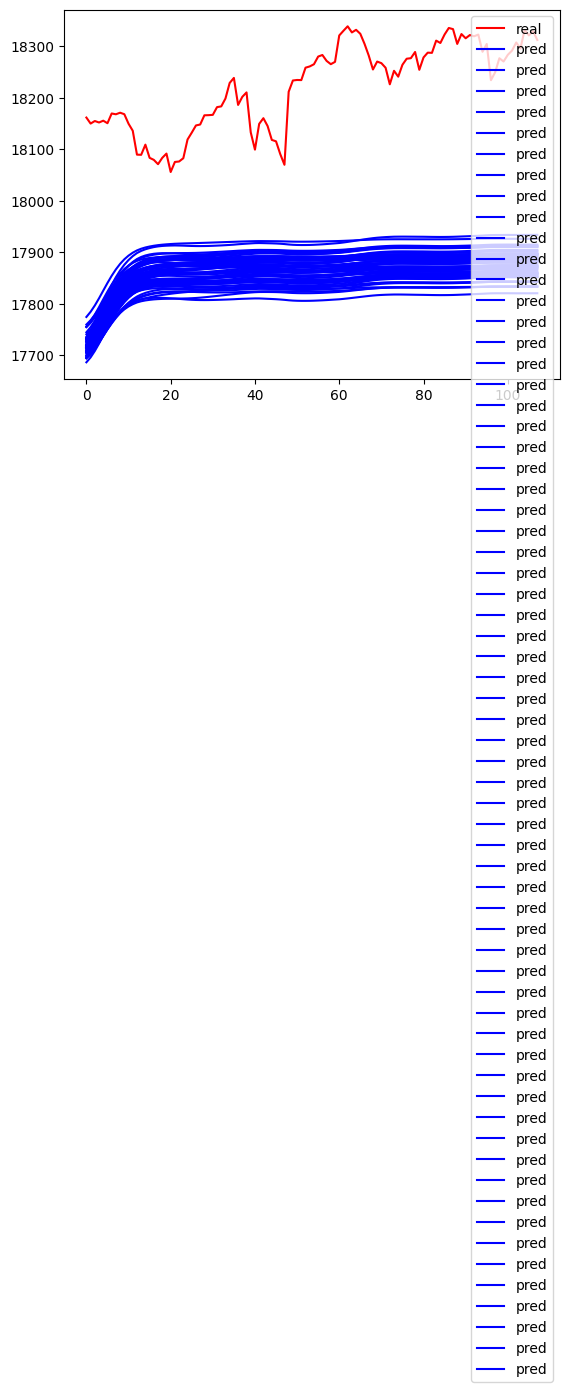

In [45]:
plt.plot(realSP, color= 'r', label= 'real')
plt.plot(pred, color= 'b', label= 'pred')
plt.legend()
plt.show()

In [46]:
realData= [modelInp[len(modelInp)+1-60:len(modelInp+1), 0]]

In [ ]:
realData= np.array(realData)

In [ ]:
realData= np.reshape(realData, newshape=(realData.shape[0], realData.shape[1], 1))

In [ ]:
prediction= regressor.predict(realData)

In [ ]:
prediction= scaler.inverse_transform(prediction)

In [ ]:
prediction